# SpecAugment - Masking

Masking Counts = 2     
Masking Value = Mean of two magnitude         
T = 80   
F = 30    

In [1]:
import numpy as np

In [2]:
filename = 'without_phase_splitted_dataset.npz'

In [3]:
dataset = np.load(filename)

In [4]:
inputs_train = dataset['inputs_train']
labels_train = dataset['labels_train']
inputs_test  = dataset['inputs_test']
labels_test  = dataset['labels_test']
inputs_valid = dataset['inputs_valid']
labels_valid = dataset['labels_valid']

-------------------------------------------

# Augmentation Parameters

Augment 1

In [5]:
T = 80
F = 30

t_num_min = 2
t_num_max = 2

f_num_min = 2
f_num_max = 2

In [6]:
augment_mask_1 = inputs_train.copy()
# augment_mask_1 = inputs.copy()

In [7]:
for i in range(800):
    mean = np.mean(inputs_train[i])
#     mean_0 = np.mean(inputs[i,0])
#     mean_2 = np.mean(inputs[i,0])
    
    n_mask_t = np.random.randint(t_num_min, t_num_max + 1 )
    for j in range(n_mask_t):
        t   = np.random.randint(0, T + 1)
        t_0 = np.random.randint(0, 382 - t)
        
        augment_mask_1[i, :, :, t_0 : t_0 + t] = 0.
#         augment_mask_1[i, :, :, t_0 : t_0 + t] = mean_0
#         augment_mask_1[i, 2, :, t_0 : t_0 + t] = mean_2
    
    
    n_mask_f = np.random.randint(f_num_min, f_num_max + 1 )
    for k in range(n_mask_f):
        f   = np.random.randint(0, F + 1)
        f_0 = np.random.randint(0, 257 - f)
        
        augment_mask_1[i, :, f_0 : f_0 + f, :] = 0.
#         augment_mask_1[i, 0, f_0 : f_0 + f , :] = mean_0
#         augment_mask_1[i, 2, f_0 : f_0 + f , :] = mean_2

Augment 2

In [8]:
augment_mask_2 = inputs_train.copy()

In [9]:
for i in range(800):
    mean = np.mean(inputs_train[i])

    n_mask_t = np.random.randint(2, 4)
    for j in range(n_mask_t):
        t   = np.random.randint(0, T + 1)
        t_0 = np.random.randint(0, 382 - t)
        
        augment_mask_2[i, :, :, t_0 : t_0 + t] = 0.
    
    n_mask_f = np.random.randint(2, 4)
    for k in range(n_mask_f):
        f   = np.random.randint(0, F + 1)
        f_0 = np.random.randint(0, 257 - f)
        
        augment_mask_2[i, :, f_0 : f_0 + f, :] = 0.

Augment 3

In [10]:
augment_mask_3 = inputs_train.copy()

In [11]:
for i in range(800):
    mean = np.mean(inputs_train[i])
    
    n_mask_t = np.random.randint(2, 4)
    for j in range(n_mask_t):
        t   = np.random.randint(0, T + 1)
        t_0 = np.random.randint(0, 382 - t)
        
        augment_mask_3[i, :, :, t_0 : t_0 + t] = 0.
    
    n_mask_f = np.random.randint(2, 4)
    for k in range(n_mask_f):
        f   = np.random.randint(0, F + 1)
        f_0 = np.random.randint(0, 257 - f)
        
        augment_mask_3[i, :, f_0 : f_0 + f, :] = 0.

Comparision

In [12]:
print((inputs_train == augment_mask_1).all())
print((inputs_train == augment_mask_2).all())
print((inputs_train == augment_mask_3).all())


False
False
False


In [13]:
import matplotlib.pyplot as plt

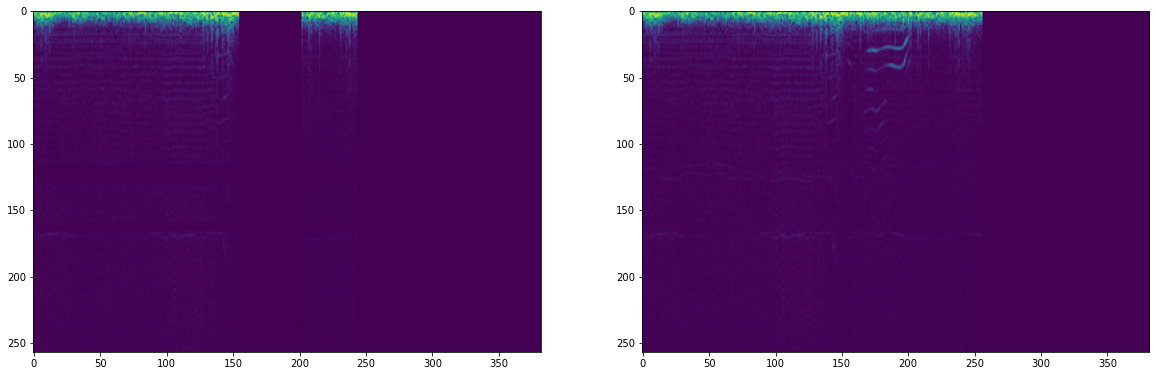

In [14]:
index = 200
fig = plt.figure(figsize=(20,15))
fig1 = fig.add_subplot(1,2,1)
fig1.imshow(augment_mask_1[index,0])
fig2 = fig.add_subplot(1,2,2)
fig2.imshow(inputs_train[index,0])

plt.show()

In [15]:
# np.savez_compressed('masked_aug_dataset', augment_mask_1=augment_mask_1, augment_mask_2=augment_mask_2, augment_mask_3=augment_mask_3)

In [16]:
print(augment_mask_1.shape)
print(augment_mask_2.shape)
print(augment_mask_3.shape)

(800, 2, 257, 382)
(800, 2, 257, 382)
(800, 2, 257, 382)


Concatenate Masked Dataset

In [17]:
inputs_train = np.concatenate((inputs_train, augment_mask_1, augment_mask_2, augment_mask_3), axis=0)
labels_train = np.concatenate((labels_train, labels_train  , labels_train  , labels_train  ), axis=0)

In [18]:
print(inputs_train.shape)
print(labels_train.shape)
print(inputs_test.shape)
print(labels_test.shape)

(3200, 2, 257, 382)
(3200,)
(200, 2, 257, 382)
(200,)


In [19]:
np.savez_compressed('masked_aug_dataset_to_zero',
                    inputs_train = inputs_train,
                    inputs_test  = inputs_test,
                    inputs_valid = inputs_valid,
                    labels_train  = labels_train,
                    labels_test   = labels_test,
                    labels_valid  = labels_valid
                   )

---------------------------------

## Note   

Commits Changes


In [ ]:
PATH = '../compu/data/'
filename = 'dataset_1.mat'
mat_file = io.loadmat(PATH + filename)
filename = 'angle.mat'
angle_file = io.loadmat(PATH + filename)

In [ ]:
S_left = mat_file['S_left']
S_right = mat_file['S_right']
# S_left_phase = mat_file['S_left_phase']
# S_right_phase = mat_file['S_right_phase']

phi = angle_file['phi']
phi = phi[:1000]

In [ ]:
# np.savez_compressed('dataset', 
#                     S_left=S_left,
#                     S_right=S_right, 
#                     S_left_phase=S_left_phase, 
#                     S_right_phase=S_right_phase, 
#                     phi=phi)

In [ ]:
S_left        = np.transpose(S_left,        (2, 0, 1))
# S_left_phase  = np.transpose(S_left_phase,  (2, 0, 1))
S_right       = np.transpose(S_right,       (2, 0, 1))
# S_right_phase = np.transpose(S_right_phase, (2, 0, 1))

In [ ]:
S_left        = np.reshape(S_left,        (1000, 1, 257, 382))
# S_left_phase  = np.reshape(S_left_phase,  (1000, 1, 257, 382))
S_right       = np.reshape(S_right,       (1000, 1, 257, 382))
# S_right_phase = np.reshape(S_right_phase, (1000, 1, 257, 382))

-------------------------------
### Normalization

In [ ]:
# Log Scale
S_left  = np.log10(S_left  + 1)
S_right = np.log10(S_right + 1)

In [ ]:
magnitude = np.concatenate((S_left, S_right), axis=1)
# phase = np.concatenate((S_left_phase, S_right_phase), axis=1)

In [ ]:
for i in range(len(magnitude)):
    # Z-score Normalization
    magnitude[i] = np.divide(np.subtract(magnitude[i], magnitude[i].mean()),
                             magnitude[i].std())
#     phase[i]     = np.divide(np.subtract(phase[i]    , phase[i].mean()    ),
#                              phase[i].std())
    
    # Min-Max Normalization
    magnitude[i] = np.divide(np.subtract(magnitude[i], magnitude[i].min()),
                             np.subtract(magnitude[i].max(), magnitude[i].min() ))
#     phase[i]     = np.divide(np.subtract(phase[i]    , phase[i].min()    ),
#                              np.subtract(phase[i].max()    , phase[i].min()     ))

In [ ]:
S_left        = magnitude[:,0].reshape(1000, 1, 257, 382)
S_right       = magnitude[:,1].reshape(1000, 1, 257, 382)
# S_left_phase  = phase[:,0].reshape(1000, 1, 257, 382)
# S_right_phase = phase[:,1].reshape(1000, 1, 257, 382)

In [ ]:
print(magnitude[:,0].shape)
print(magnitude[:,1].shape)

In [ ]:
# inputs = np.concatenate((S_left, S_left_phase, S_right, S_right_phase), axis=1)
inputs = np.concatenate((S_left, S_right), axis=1)

In [ ]:
labels = phi.reshape(1000,)

labels[labels == -1] = 200
labels = np.divide(labels, 20)
labels = np.int32(labels)